## Future Sales Forecast

In [58]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series as Series
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn')
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

#### Load Datasets

In [2]:
items = pd.read_csv('datasets/items.csv')
shops = pd.read_csv('datasets/shops.csv')
sales = pd.read_csv('datasets/sales_train.csv')
items_categories = pd.read_csv('datasets/item_categories.csv')

### Data Processing

In [3]:
# Converting the column 'date' to type 'datetime'.
sales['date'] = sales['date'].apply(lambda d: pd.datetime.strptime(d, '%d.%m.%Y'))

In [4]:
# Create columns 'month' and 'total'.
sales['year'] = sales['date'].apply(lambda d: d.year)
sales['month'] = sales['date'].apply(lambda d: d.month)
sales['total_value'] = sales['item_price'] * sales['item_cnt_day']

In [5]:
# Adding column 'item_category_id'.
sales = sales.set_index('item_id').join(items.set_index('item_id')).drop('item_name', axis=1).reset_index()

In [6]:
sales.head()

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,year,month,total_value,item_category_id
0,0,2014-09-01,20,54,58.0,1.0,2014,9,58.0,40
1,1,2014-04-04,15,55,4490.0,1.0,2014,4,4490.0,76
2,1,2014-04-02,15,55,4490.0,1.0,2014,4,4490.0,76
3,1,2014-07-06,18,55,4490.0,1.0,2014,7,4490.0,76
4,1,2014-08-04,19,55,4490.0,1.0,2014,8,4490.0,76


### Data Analysis and Exploration

In [7]:
monthly_sales_2013 = sales[sales['year']==2013].groupby(['month'])['item_cnt_day', 'total_value'].sum()
monthly_sales_2014 = sales[sales['year']==2014].groupby(['month'])['item_cnt_day', 'total_value'].sum()
monthly_sales_2015 = sales[sales['year']==2015].groupby(['month'])['item_cnt_day', 'total_value'].sum()

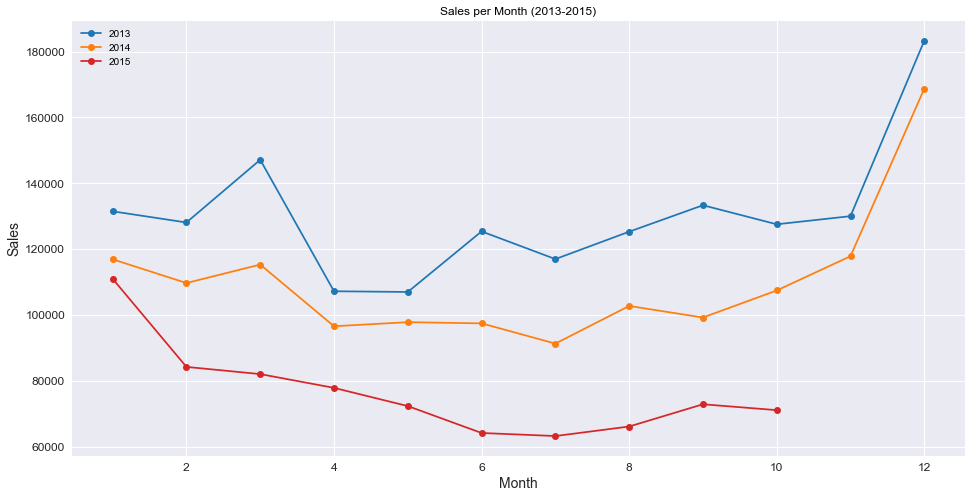

In [8]:
plt.figure(figsize=(16,8))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per Month (2013-2015)')
plt.plot(monthly_sales_2013['item_cnt_day'], '-ok', color='tab:blue', label='2013')
plt.plot(monthly_sales_2014['item_cnt_day'], '-ok', color='tab:orange', label='2014')
plt.plot(monthly_sales_2015['item_cnt_day'], '-ok', color='tab:red', label='2015')
plt.legend()

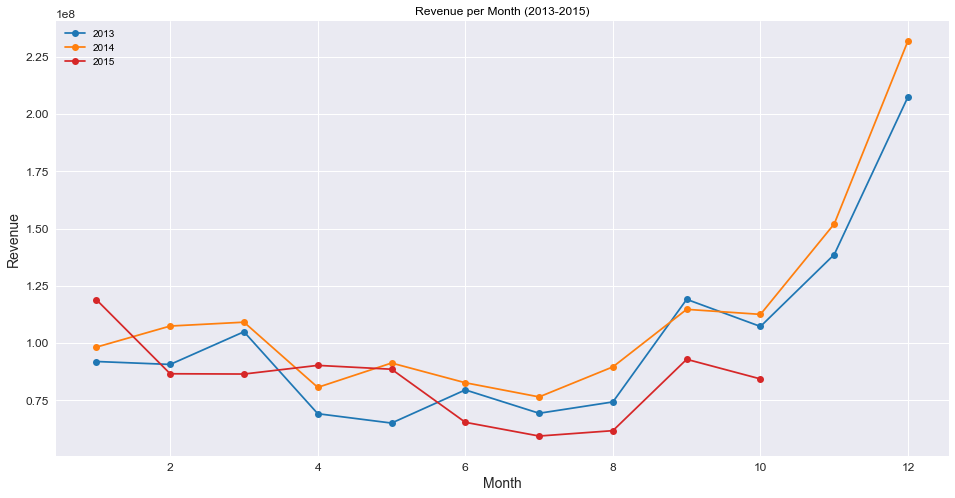

In [9]:
plt.figure(figsize=(16,8))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per Month (2013-2015)')
plt.plot(monthly_sales_2013['total_value'], '-ok', color='tab:blue', label='2013')
plt.plot(monthly_sales_2014['total_value'], '-ok', color='tab:orange', label='2014')
plt.plot(monthly_sales_2015['total_value'], '-ok', color='tab:red', label='2015')
plt.legend()

In [57]:
total_sales = sales.groupby(['date_block_num'])['item_cnt_day'].sum()

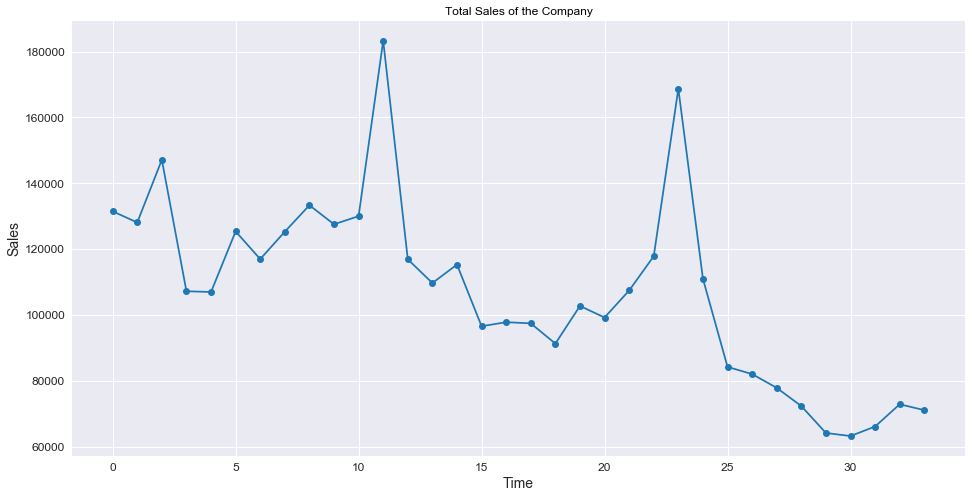

In [11]:
plt.figure(figsize=(16,8))
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Total Sales of the Company')
plt.plot(total_sales, '-ok', color='tab:blue')

In [12]:
decomposition = seasonal_decompose(total_sales.values, freq=12)

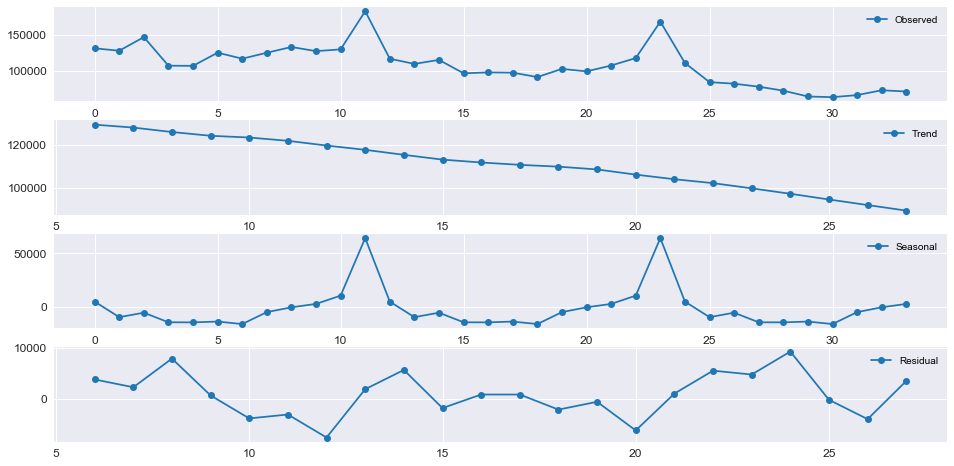

In [13]:
plt.figure(figsize=(16,8))

plt.subplot(4, 1, 1)
plt.plot(total_sales, '-ok', color='tab:blue', label='Observed')
plt.legend(loc='best')

plt.subplot(4, 1, 2) 
plt.plot(decomposition.trend, '-ok', color='tab:blue', label='Trend')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, '-ok', color='tab:blue', label='Seasonal')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, '-ok', color='tab:blue', label='Residual')
plt.legend(loc='best')

In [14]:
stores_sales = sales.groupby(['shop_id'])['item_cnt_day'].agg(item_cnt_day='sum')
stores_sales = stores_sales.sort_values(by='item_cnt_day', ascending=False)

In [15]:
stores_more_sales = stores_sales.iloc[0:10] # TOP 10
stores_more_sales = stores_more_sales.sort_values(by='shop_id').reset_index()

stores_less_sales = stores_sales.iloc[-10:] # LAST 10
stores_less_sales = stores_less_sales.sort_values(by='shop_id').reset_index()

<BarContainer object of 10 artists>

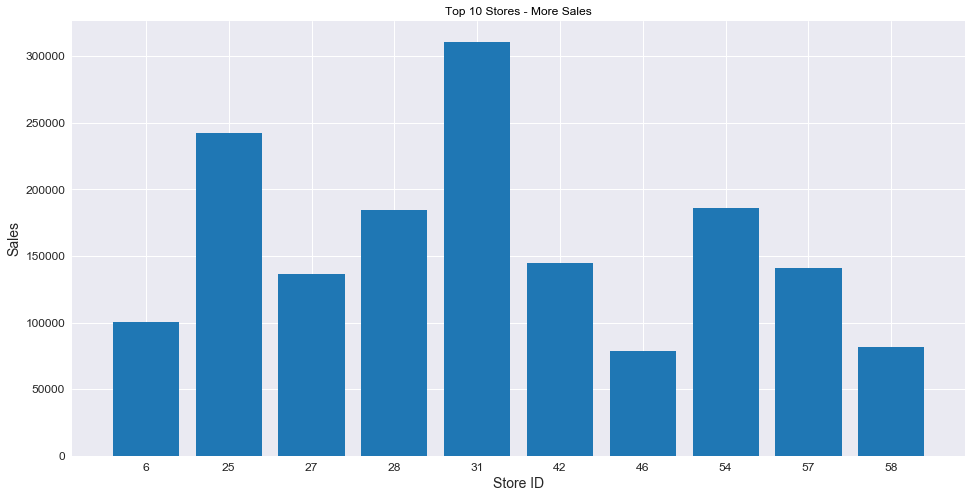

In [16]:
plt.figure(figsize=(16,8))
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.title('Top 10 Stores - More Sales')
plt.bar(stores_more_sales['shop_id'].astype('str'), stores_more_sales['item_cnt_day'], color='tab:blue')

<BarContainer object of 10 artists>

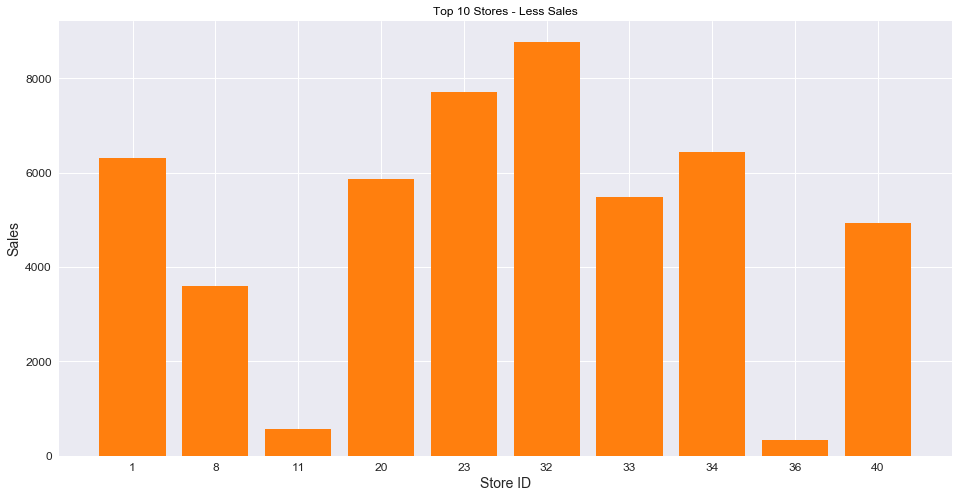

In [17]:
plt.figure(figsize=(16,8))
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.title('Top 10 Stores - Less Sales')
plt.bar(stores_less_sales['shop_id'].astype('str'), stores_less_sales['item_cnt_day'], color='tab:orange')

In [18]:
stores_revenue = sales.groupby(['shop_id'])['total_value'].agg(total_value='sum')
stores_revenue = stores_revenue.sort_values(by='total_value', ascending=False)

In [19]:
stores_highest_revenue = stores_revenue.iloc[0:10] # TOP 10
stores_highest_revenue = stores_highest_revenue.sort_values(by='shop_id').reset_index()

stores_lower_revenue = stores_revenue.iloc[-10:] # LAST 10
stores_lower_revenue = stores_lower_revenue.sort_values(by='shop_id').reset_index()

<BarContainer object of 10 artists>

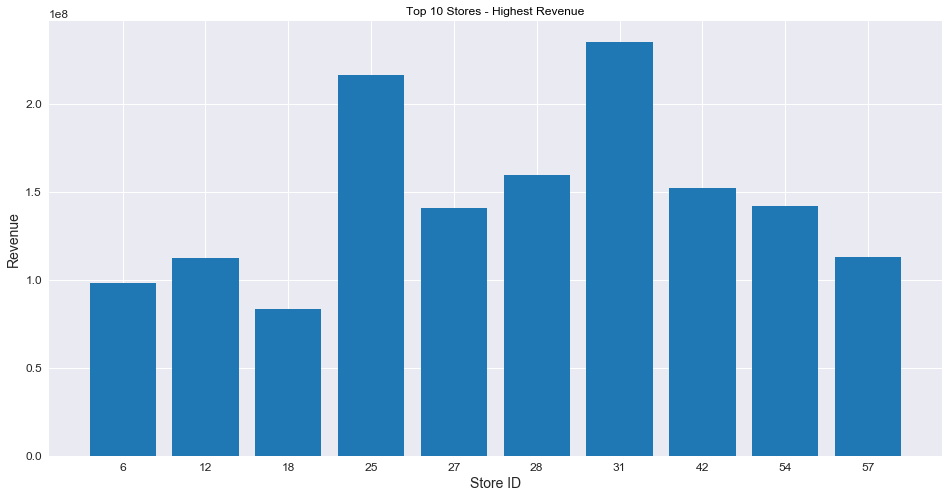

In [20]:
plt.figure(figsize=(16,8))
plt.xlabel('Store ID')
plt.ylabel('Revenue')
plt.title('Top 10 Stores - Highest Revenue')
plt.bar(stores_highest_revenue['shop_id'].astype('str'), stores_highest_revenue['total_value'], color='tab:blue')

<BarContainer object of 10 artists>

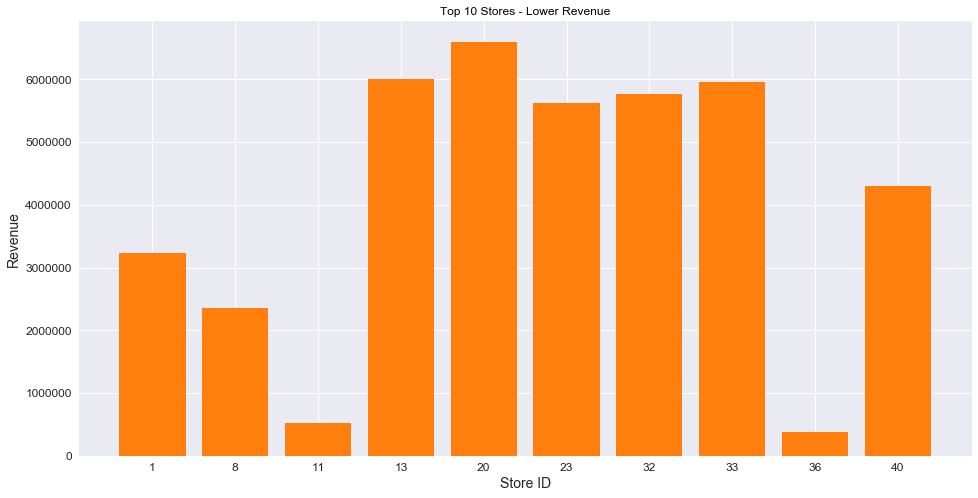

In [21]:
plt.figure(figsize=(16,8))
plt.xlabel('Store ID')
plt.ylabel('Revenue')
plt.title('Top 10 Stores - Lower Revenue')
plt.bar(stores_lower_revenue['shop_id'].astype('str'), stores_lower_revenue['total_value'], color='tab:orange')

In [22]:
sales_category = sales.groupby(['item_category_id'])['item_cnt_day'].agg(item_cnt_day='sum')
sales_category = sales_category.sort_values(by='item_cnt_day', ascending=False).astype('int')

In [23]:
category_more_sales = sales_category.iloc[0:10] # TOP 10
category_more_sales = category_more_sales.sort_values(by='item_category_id').reset_index()

category_less_sales = sales_category.iloc[-10:] # LAST 10
category_less_sales = category_less_sales.sort_values(by='item_category_id').reset_index()

<BarContainer object of 10 artists>

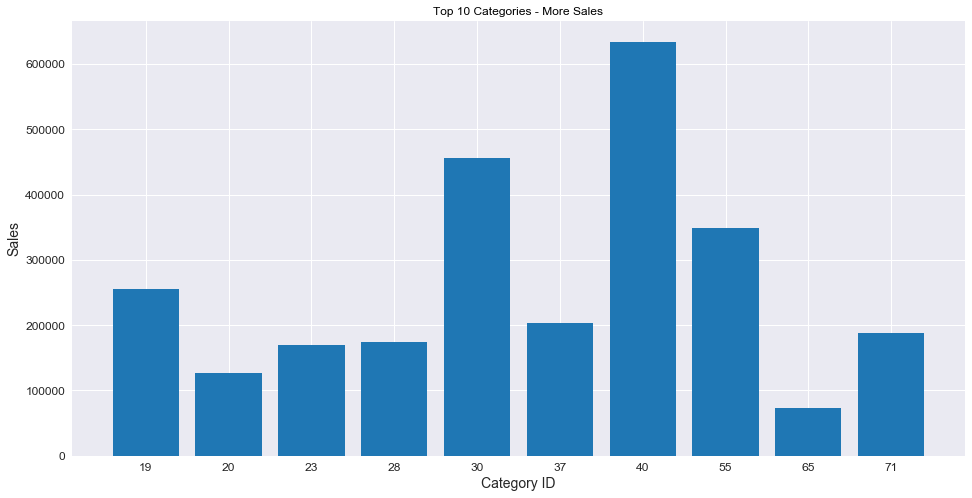

In [24]:
plt.figure(figsize=(16,8))
plt.xlabel('Category ID')
plt.ylabel('Sales')
plt.title('Top 10 Categories - More Sales')
plt.bar(category_more_sales['item_category_id'].astype('str'), category_more_sales['item_cnt_day'], color='tab:blue')

<BarContainer object of 10 artists>

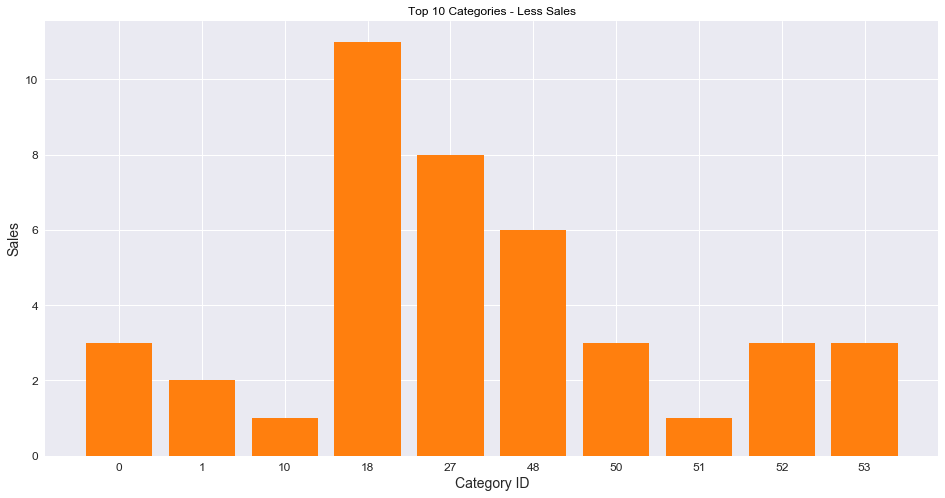

In [25]:
plt.figure(figsize=(16,8))
plt.xlabel('Category ID')
plt.ylabel('Sales')
plt.title('Top 10 Categories - Less Sales')
plt.bar(category_less_sales['item_category_id'].astype('str'), category_less_sales['item_cnt_day'], color='tab:orange')

### Machine Learning Model

#### Preprocessing

In [64]:
start_date = pd.datetime.strftime(sales['date'].min(), '%Y-%m-%d')
end_date = pd.datetime.strftime(sales['date'].max(), '%Y-%m-%d')

In [65]:
total_sales = sales.groupby(['date_block_num'])['item_cnt_day'].sum()
total_sales.index = pd.date_range(start=start_date, end=end_date, freq='MS')

In [66]:
total_sales.head()

2013-01-01    131479.0
2013-02-01    128090.0
2013-03-01    147142.0
2013-04-01    107190.0
2013-05-01    106970.0
Freq: MS, Name: item_cnt_day, dtype: float64

#### Stationarity Test

In [69]:
def adf_test(data):
    adf = adfuller(data, autolag='AIC')
    print('Results of Augmented Dickey–Fuller Test')
    print('p-value:', adf[1])
    print('The Series is Stationary.' if adf[1] <= 0.05 else 'The Series isn\'t Stationary.')

adf_test(total_sales)

Results of Augmented Dickey–Fuller Test
p-value: 0.1429525769929046
The Series isn't Stationary


#### Defining Seasonality

In [107]:
# Create a Differenced Series
def difference(data, interval=1):
    interval_diff = range(interval, len(data))
    return Series(data=[data[i] - data[i - interval] for i in interval_diff],
                  index=data[-len(interval_diff):].index)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

In [88]:
# Assuming the seasonality is 12 months long
new_total_sales = difference(total_sales, interval=12)

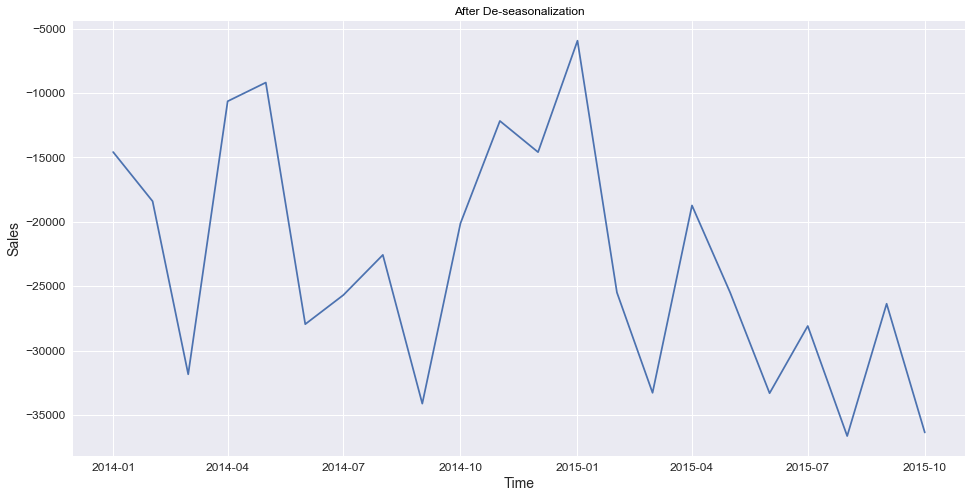

In [89]:
plt.figure(figsize=(16,8))
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(new_total_sales)

In [92]:
adf_test(new_total_sales)

Results of Augmented Dickey–Fuller Test
p-value: 0.01626900992370418
The Series is Stationary


#### Training Base and Test Base

In [93]:
new_total_sales
# train, test = train_test_split(total_sales, train_size=0.7)

2014-01-01   -14580.0
2014-02-01   -18403.0
2014-03-01   -31845.0
2014-04-01   -10634.0
2014-05-01    -9180.0
2014-06-01   -27952.0
2014-07-01   -25686.0
2014-08-01   -22570.0
2014-09-01   -34124.0
2014-10-01   -20119.0
2014-11-01   -12164.0
2014-12-01   -14587.0
2015-01-01    -5928.0
2015-02-01   -25489.0
2015-03-01   -33283.0
2015-04-01   -18729.0
2015-05-01   -25495.0
2015-06-01   -33315.0
2015-07-01   -28093.0
2015-08-01   -36642.0
2015-09-01   -26365.0
2015-10-01   -36366.0
Freq: MS, dtype: float64

#### ARIMA Model

In [94]:
# Add Comment (Parameters)
auto_arima_model = auto_arima(new_total_sales, start_p=1, start_q=1, max_p=6, max_q=6, m=12,
                              start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                              suppress_warnings=True, stepwise=False)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=200.729, BIC=201.123, Fit time=0.112 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=193.496, BIC=194.087, Fit time=0.073 seconds
Fit ARIMA: order=(0,

In [95]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   22
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                 -93.748
Date:                            Sat, 18 Jan 2020   AIC                            193.496
Time:                                    15:18:50   BIC                            194.087
Sample:                                         0   HQIC                           192.219
                                             - 22                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    695.7145    328.064      2.121      0.034      52.722    1338.707
ma.L1         -0.9998      0.721     -1.387      0.166      -2.413       0.413
sigma2      6.098e+07   8.83e-06   6.91e+12      0.000     6.1e+07     6.1e+07
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.48
Prob(Q):                               nan   Prob(JB):                         0.79
Heteroskedasticity (H):               4.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.23   Kurtosis:                         1.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.61e+31. Standard errors may be unstable.
"""

In [96]:
arima_model = ARIMA(new_total_sales, order=(0, 1, 1))
arima_model = arima_model.fit()
arima_model.summary()

# Forecast for the next 5 Months
# predictions = arima_model.predict(n_periods=test.shape[0])

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   21
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -220.623
Method:                       css-mle   S.D. of innovations           8211.637
Date:                Sat, 18 Jan 2020   AIC                            447.245
Time:                        15:21:28   BIC                            450.379
Sample:                    02-01-2014   HQIC                           447.925
                         - 10-01-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -659.4589    275.953     -2.390      0.027   -1200.317    -118.601
ma.L1.D.y     -1.0000      0.168     -5.936      0.000      -1.330      -0.670
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [112]:
predictions = arima_model.forecast(steps=12)[0]

# predictions = pd.DataFrame(predictions, index=test.index, columns=['item_cnt_day'])

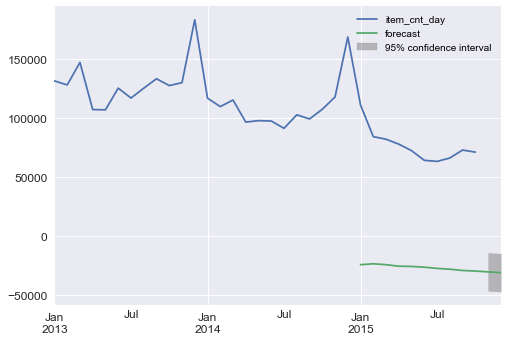

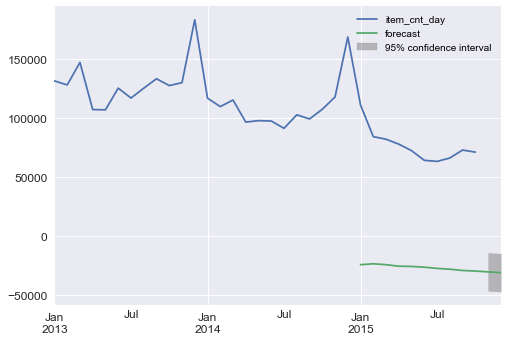

In [113]:
axis = total_sales.plot()
arima_model.plot_predict('2015-01-01', '2015-12-01', ax=axis, plot_insample=False)

# pd.concat([total_sales, predictions], axis=1).plot()